In [1]:

import json
import sys
import datetime
import contextlib
import OpenSSL.crypto
import os
import requests
import ssl
import tempfile
from io import StringIO
import yaml
import pandas as pd
import numpy as np
import itertools


import urllib.request

import datetime
import xlrd
import holidays

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

import statsmodels.api as sm

from dateutil.relativedelta import relativedelta

import statistics
import seaborn as sns
import tensorflow as tf

from statsmodels.tsa.seasonal import STL, seasonal_decompose

In [60]:
data = pd.read_csv("Z:\Dropbox (PowerMarketsUR)\Moscow Office\ERCOT\MCC_INFLUENCE\spp\mcc/WAUE.AWD2.AURAWIND.csv")
convert_dict = {'Year': str, 'Month': str, 'Day': str}
data = data.astype(convert_dict)
data["date"] = data["Year"] + "-" + data["Month"] + "-" + data["Day"]

data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
    
consideAgg = data.groupby(["date"], as_index=False).agg({'Price': 'mean'})
consideAgg

,date,Price
0,2020-08-01,-0.419642
1,2020-08-02,-4.373450
2,2020-08-03,-1.140004
3,2020-08-04,-3.652142
4,2020-08-05,-0.750717
...,...,...
814,2022-10-24,-7.473504
815,2022-10-25,5.651788
816,2022-10-26,23.425708
817,2022-10-27,23.005525


In [61]:
res = STL(consideAgg['Price'].values, period=12).fit()

dataPlot = pd.DataFrame()
dataPlot['mcc'] = consideAgg['Price']
dataPlot['date'] = consideAgg['date']
dataPlot['resid'] = res.resid
dataPlot['seasonal'] = res.seasonal
dataPlot['trend'] = res.trend
dataPlot
# fig = res.plot()
# fig.set_size_inches((20, 15))
# fig.tight_layout()
# plt.show()

,mcc,date,resid,seasonal,trend
0,-0.419642,2020-08-01,2.278733,1.166545,-3.864920
1,-4.373450,2020-08-02,-0.071600,-0.340997,-3.960854
2,-1.140004,2020-08-03,-0.684158,3.590159,-4.046006
3,-3.652142,2020-08-04,-0.396945,0.864867,-4.120063
4,-0.750717,2020-08-05,0.212325,3.219216,-4.182257
...,...,...,...,...,...
814,-7.473504,2022-10-24,7.821726,-23.731003,8.435772
815,5.651788,2022-10-25,8.106704,-12.371544,9.916628
816,23.425708,2022-10-26,-3.893830,15.938908,11.380631
817,23.005525,2022-10-27,4.330012,5.861637,12.813876


<AxesSubplot:xlabel='date', ylabel='trend'>

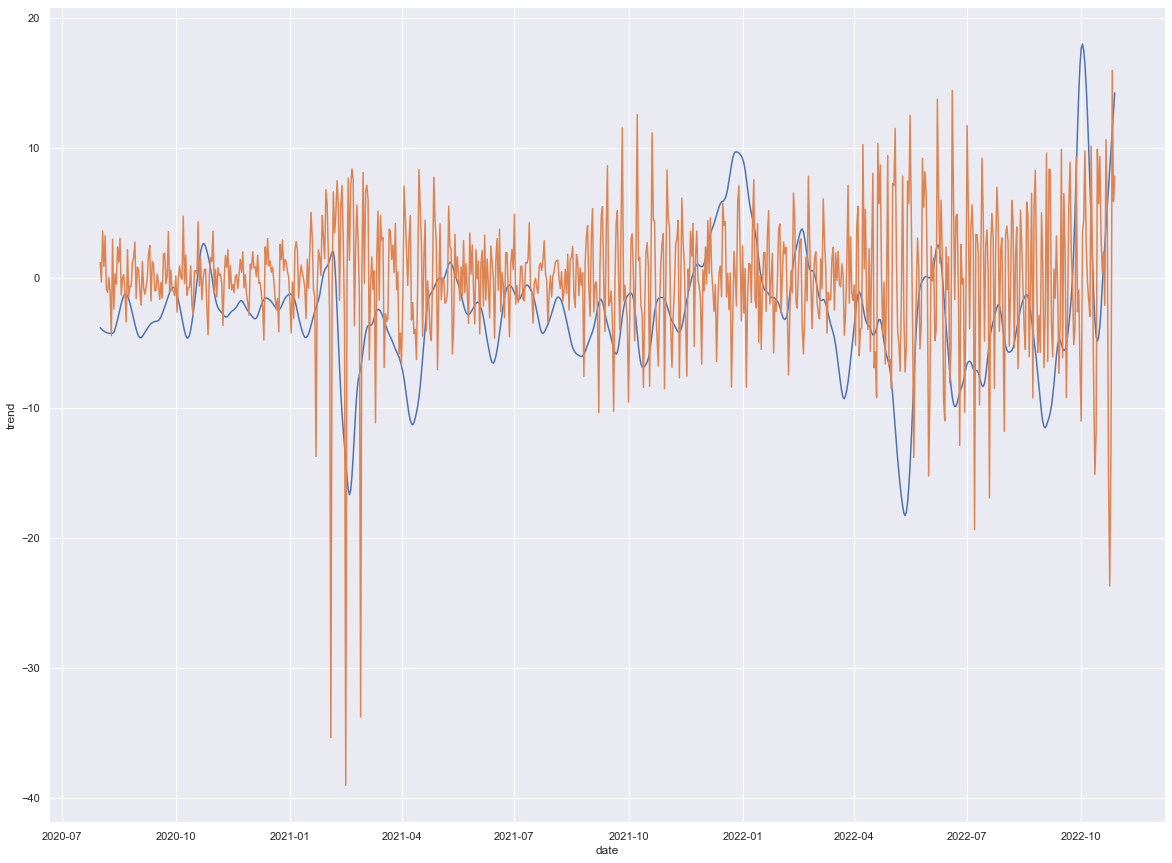

In [62]:
sns.set(rc={'figure.figsize':(20,15)})
# sns.lineplot(data=dataPlot, x="date", y="mcc",   label='mcc')
sns.lineplot(data=dataPlot, x="date", y="trend")
sns.lineplot(data=dataPlot, x="date", y="seasonal")
# sns.scatterplot(data=dataPlot, x="date", y="resid",  label='resid' )